# Audio Data Plots
This notebook aims at visualizing:
- The signals of the clean audio wavfiles in frequency and time domain
- The Spectrograms of the wavfiles
- The Melspectrograms of the wavfiles

In [2]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Permute
import kapre
from kapre.time_frequency import Melspectrogram, Spectrogram
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile

plt.style.use('ggplot')

2024-09-19 09:42:41.029282: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-09-19 09:42:41.029375: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Define the Spectrogram and Melspectrogram models

stft_model = Sequential()
stft_model.add(Spectrogram(n_dft=512, n_hop=160, input_shape=(1,16000),
                           return_decibel_spectrogram=True,
                           trainable_kernel=False, name='spectrogram'))

mel_model = Sequential()
mel_model.add(Melspectrogram(sr=16000, n_mels=128, 
                             n_dft=512, n_hop=160, input_shape=(1,16000), 
                             return_decibel_melgram=True,
                             trainable_kernel=False, name='melspectrogram'))

2024-09-19 09:42:48.143704: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2024-09-19 09:42:48.639937: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:968] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 09:42:48.640007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX130 computeCapability: 5.0
coreClock: 1.189GHz coreCount: 3 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 37.33GiB/s
2024-09-19 09:42:48.640200: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-09-19 09:42:48.640337: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic libra

In [4]:
# Signal plot function
def plot_signals_time(titles, signals):
    nrows, ncols = 2, 5
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6))
    
    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i,y].set_title(titles[z])
            ax[i,y].plot(signals[z])
            ax[i,y].set_xticks([])
            ax[i,y].set_yticks([])
            ax[i,y].grid(False)
            z += 1
    
    plt.show()

In [5]:
# Spectrogram plot function
def plot_spectrogram(titles, signals, title, shape=(16,8)):
    nrows, ncols = 2, 5
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)
    fig.suptitle(title, size=20)
    plt.set_cmap('viridis')
    
    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i,y].set_title(titles[z])
            ax[i,y].imshow(signals[z].squeeze())
            ax[i,y].set_xticks([])
            ax[i,y].set_yticks([])
            ax[i,y].grid(False)
            z += 1
    
    plt.show()

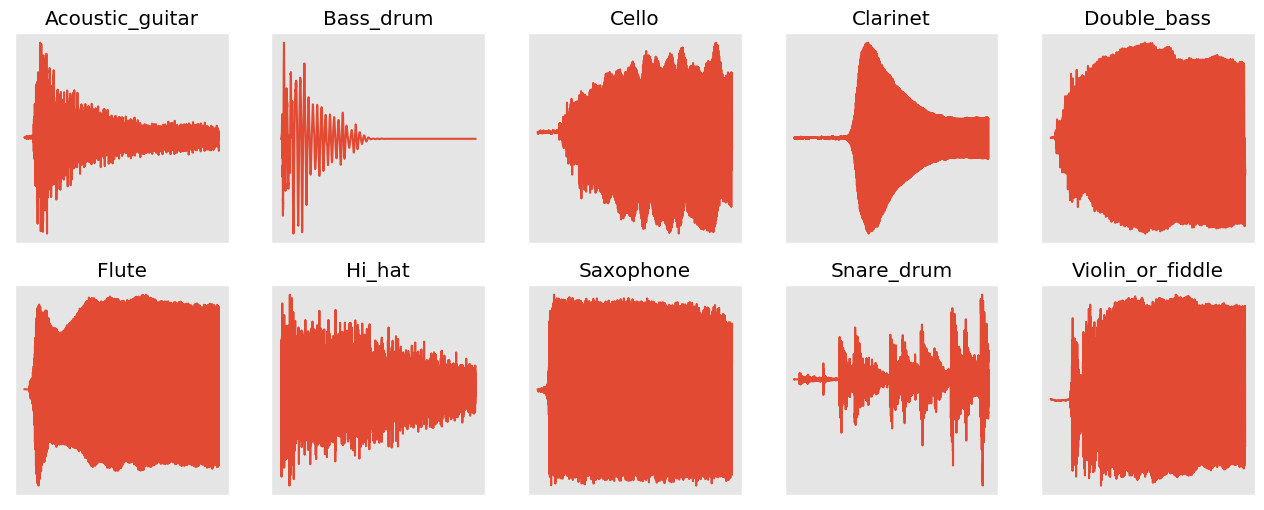

In [7]:
# Load and sort the clean audio wavfiles
src_root = '../clean'

classes = os.listdir(src_root)
signals = []
titles = []
stft_specs = []
mel_specs = []

for _cls in sorted(classes):
    for fn in sorted(os.listdir(os.path.join(src_root, _cls))):
        rate, wav = wavfile.read(os.path.join(src_root, _cls, fn))
        signals.append(wav)
        titles.append(_cls)
        
        wav = wav.reshape(1, 1, -1)
        spec = stft_model.predict(wav)
        mel = mel_model.predict(wav)
        stft_specs.append(spec)
        mel_specs.append(mel)
        break

# Plot the audio signals        
plot_signals_time(titles, signals)

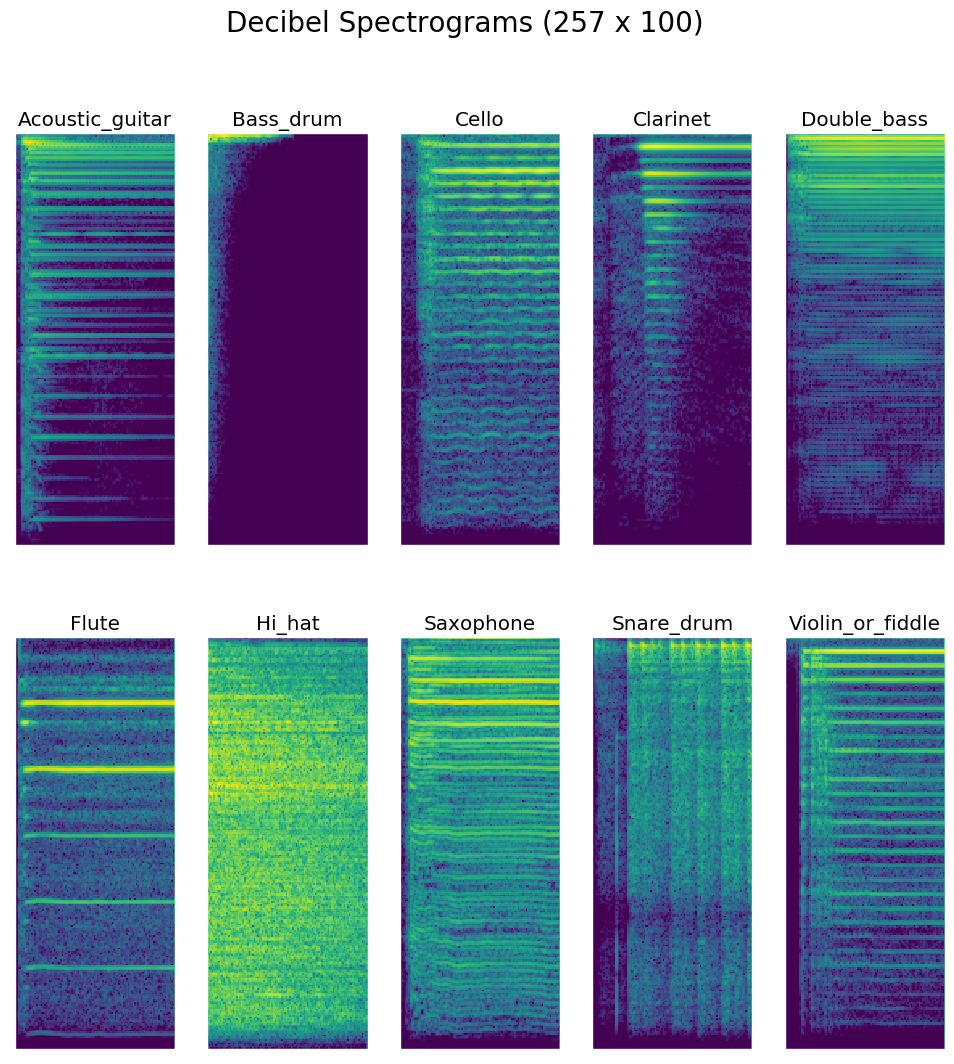

In [8]:
# Plot the Spectrograms
plot_spectrogram(titles, stft_specs, title='Decibel Spectrograms (257 x 100)', shape=(12,12))

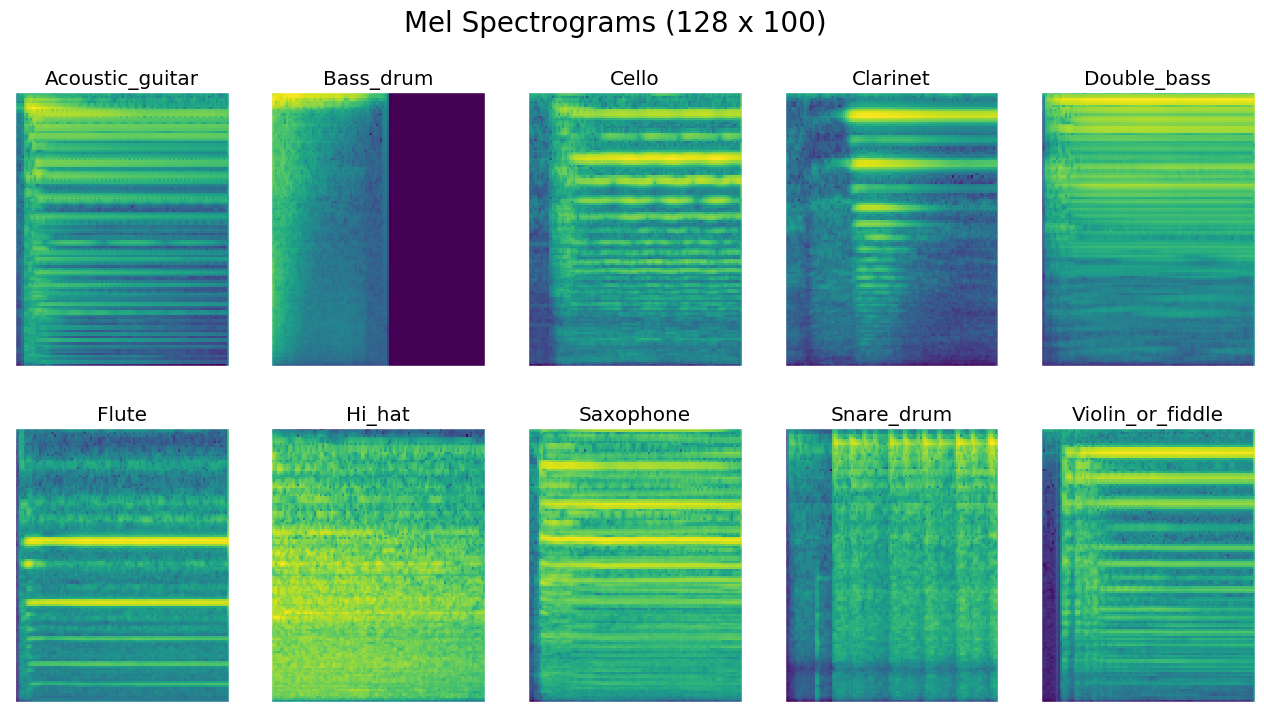

In [9]:
# Plot the Melspectrograms
plot_spectrogram(titles, mel_specs, title='Mel Spectrograms (128 x 100)', shape=(16,8))

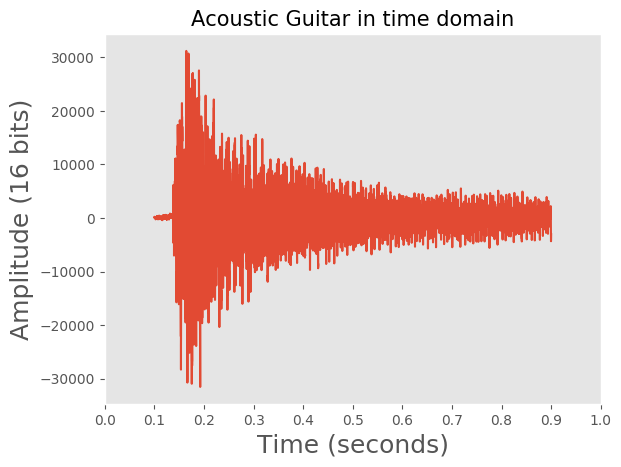

In [12]:
# Plot an audio wavfile in time domain
rate, wav = wavfile.read(os.path.join(src_root, 'Acoustic_guitar', '0356dec7_0.wav'))

plt.plot(wav)
plt.title('Acoustic Guitar in time domain', size=15)
plt.grid(False)
locs, labels = plt.xticks()
plt.xticks(locs, ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', ''])
plt.ylabel('Amplitude (16 bits)', size=18)
plt.xlabel('Time (seconds)', size=18)
plt.show()

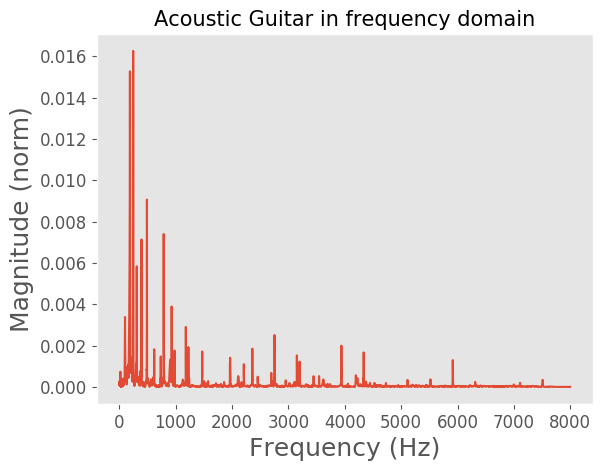

In [13]:
# Plot the audio wavfile in frequency domain
fft = np.fft.rfft(wav)
plt.plot(np.abs(fft)/np.sum(np.abs(fft)))
plt.title('Acoustic Guitar in frequency domain', size=15)
plt.grid(False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Magnitude (norm)', size=18)
plt.xlabel('Frequency (Hz)', size=18)
plt.show()